In [84]:
import os
import glob
import subprocess
from concurrent.futures import ThreadPoolExecutor
from multiprocessing import freeze_support
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [85]:
!rm -rf ./out
!mkdir ./out

In [86]:
cur_dir = %pwd

In [87]:
in_files = glob.glob(os.path.join(cur_dir, 'in', '*.txt'))
test_cases = [os.path.basename(f) for f in in_files]   

In [88]:
df = pd.read_csv("test_res.csv", index_col=0)
d = {}

In [89]:
def exec(in_file: str):
    out_file = os.path.join(cur_dir, 'out', os.path.basename(in_file))
    res = subprocess.run(f"./main < {in_file} > {out_file}", shell=True, stderr=subprocess.PIPE)
    s = res.stderr.decode('utf-8').strip().split('\n')[-1].strip()
    test_case = os.path.basename(in_file)
    d[test_case] = int(s)

In [90]:
freeze_support()
with ThreadPoolExecutor(max_workers=50) as executor:
    executor.map(exec, in_files)

cur_time = datetime.datetime.now().isoformat()
df[cur_time] = d

In [91]:
df = df.sort_index()

In [92]:
df.to_csv("test_res.csv")

In [93]:
df = df.iloc[:, -5:]
df = df.applymap(lambda x: np.log10(x) if x > 0 else 0)

In [94]:
df.describe()

,2023-12-25T16:44:56.135549,2023-12-25T17:03:55.887693,2023-12-25T18:21:57.182957,2023-12-26T09:54:19.285649,2023-12-26T10:00:50.600343
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.392127,5.448760,5.441431,5.551478,5.416931
std,1.230059,1.234352,1.230744,1.272475,1.377193
min,3.173478,2.053078,2.666518,2.269513,0.000000
25%,4.419095,4.476991,4.476367,4.579717,4.436571
50%,5.240736,5.311505,5.268442,5.392903,5.291909
75%,6.085832,6.154780,6.144016,6.280986,6.211113
max,9.729033,9.742189,9.729033,9.707227,9.707227


In [95]:
df.iloc[:, -1].mean()

5.4169313270909045

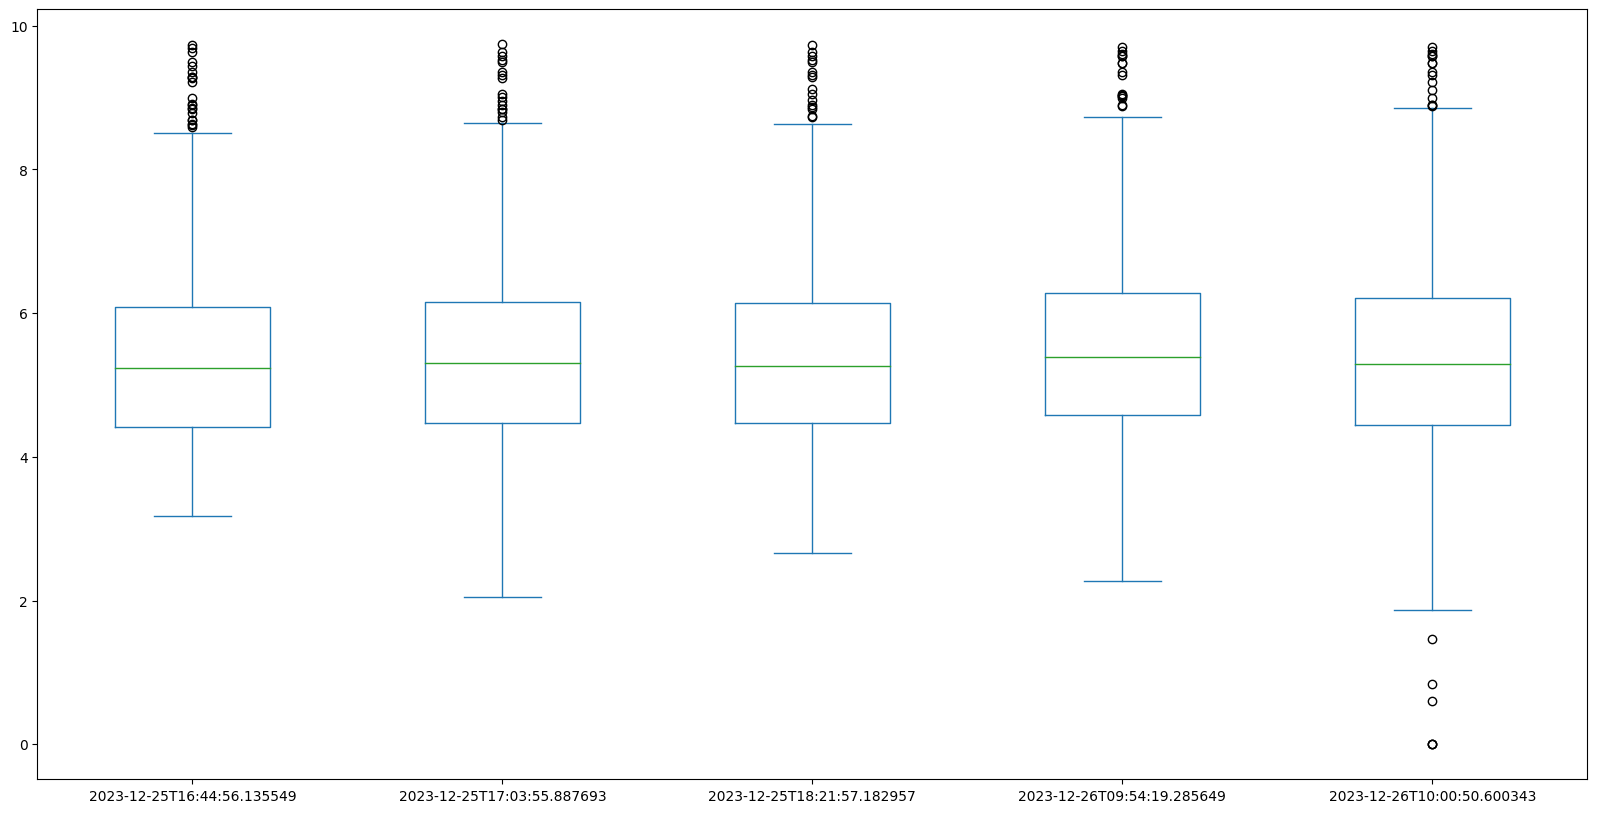

In [96]:
df.plot(kind="box", figsize=(20, 10))
plt.show()

In [97]:
df.sort_values(by=[cur_time], ascending=False)

,2023-12-25T16:44:56.135549,2023-12-25T17:03:55.887693,2023-12-25T18:21:57.182957,2023-12-26T09:54:19.285649,2023-12-26T10:00:50.600343
0696.txt,9.283238,9.279426,9.283238,9.707227,9.707227
0369.txt,9.729033,9.742189,9.729033,9.648585,9.648585
0517.txt,9.352180,9.576977,9.576977,9.609155,9.609155
0759.txt,9.688696,9.523461,9.523461,9.585633,9.585633
0684.txt,9.634218,9.634218,9.634218,9.580573,9.580573
...,...,...,...,...,...
0523.txt,5.373000,5.608090,5.611911,5.632392,0.845098
0202.txt,5.900990,5.915546,5.915546,6.774423,0.602060
0607.txt,5.904531,6.255936,6.001854,6.135755,0.000000
0041.txt,5.699538,5.733006,5.689243,5.714088,0.000000


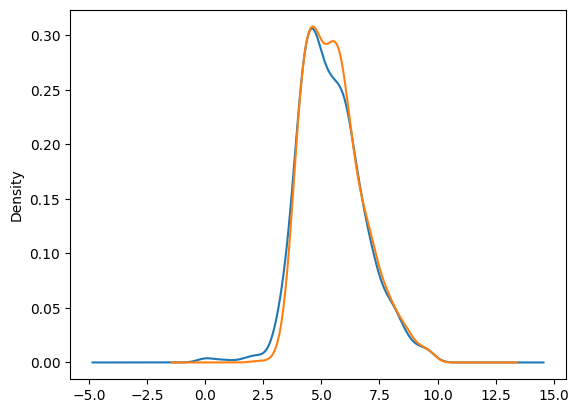

In [98]:
# bins = np.linspace(0, 10, 40)
last_sel = df.iloc[:, -1]
last_sel.plot.kde()
last2_sel = df.iloc[:, -2]
last2_sel.plot.kde()
plt.show()

In [99]:
last_df = df.iloc[:, -1]
wins = df.sub(last_df, axis=0)<0
loses = df.sub(last_df, axis=0)>0
win_cnt = wins.sum(axis=0)
lose_cnt = loses.sum(axis=0)
(win_cnt - lose_cnt).sort_index(ascending=False)

2023-12-26T10:00:50.600343      0
2023-12-26T09:54:19.285649     31
2023-12-25T18:21:57.182957    259
2023-12-25T17:03:55.887693    244
2023-12-25T16:44:56.135549    385
dtype: int64